# Project: Determining Mental Health from Tweets
Tim Graf (??-???-???) & Yanis Schärer (18-114-058)

In [28]:
# import and define important stuff
import pandas as pd
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Task 1: Data Exploration and Processing
#### Load data

In [2]:
raw = pd.read_csv('data/Mental-Health-Twitter.csv', index_col=0)
display(raw)

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain has other ideas...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) When in trouble, delegate. (3) When in doubt, mumble.",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,"The flow chart is a most thoroughly oversold piece of program documentation. ― Frederick Brooks, Jr., The Mythical Man Month",1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never meant to stay there.",1169875706,442,230,7,1063601,0,0


In [3]:
# drop unimportant columns
data = raw.drop(columns=['post_id','post_created','user_id','followers', 'friends', 'favourites', 'statuses', 'retweets'])
display(data)

,post_text,label
0,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1
1,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1
2,Awake but tired. I need to sleep but my brain has other ideas...,1
3,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1
4,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1
...,...,...
19995,A day without sunshine is like night.,0
19996,"Boren's Laws: (1) When in charge, ponder. (2) When in trouble, delegate. (3) When in doubt, mumble.",0
19997,"The flow chart is a most thoroughly oversold piece of program documentation. ― Frederick Brooks, Jr., The Mythical Man Month",0
19998,"Ships are safe in harbor, but they were never meant to stay there.",0


#### Basic Statistics

In [27]:
print('Number of unique users:', raw['user_id'].nunique())
print(20*'-')

print('Number of samples:', len(data.index))
print('-> Of which are positive:', len(data[data['label'] == 1]))
print('-> Of which are negative:', len(data[data['label'] == 0]))
print(20*'-')

lengths = [len(nltk.word_tokenize(tweet)) for tweet in data['post_text']]
print(f'Average tweet length (characters): {data["post_text"].str.len().mean():.0f}')
print(f'Average tweet length (words): {sum(lengths)/len(lengths):.0f}')
print('Shortest tweet(s) length (characters):', data['post_text'].str.len().min())
print('-> Example:')
display(data[data['post_text'].str.len() == data['post_text'].str.len().min()][:1])
print('Longest tweet(s) length (characters):', data['post_text'].str.len().max())
print('-> Example:')
display(data[data['post_text'].str.len() == data['post_text'].str.len().max()][:1])
print('Shortest tweet(s) length (words):', min(lengths))
print('-> Example:')
display(data.loc[lengths.index(min(lengths)):lengths.index(min(lengths))])
print('Longest tweet(s) length (words):', max(lengths))
print('-> Example:')
display(data.loc[lengths.index(max(lengths)):lengths.index(max(lengths))])

Number of unique users: 72
--------------------
Number of samples: 20000
-> Of which are positive: 10000
-> Of which are negative: 10000
--------------------
Average tweet length (characters): 82
Average tweet length (words): 17
Shortest tweet(s) length (characters): 4
-> Example:


,post_text,label
4659,WHAT,1


Longest tweet(s) length (characters): 169
-> Example:


,post_text,label
12764,@Slate JUST LET HIM FAIL AS HE WILL&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;but the Dems better be ready to save the country when he fails!!!! https://t.co/R6RLKc0Wu0,0


Shortest tweet(s) length (words): 1
-> Example:


,post_text,label
2766,Fuckkkkkkkkkkk,1


Longest tweet(s) length (words): 65
-> Example:


,post_text,label
12948,@HuffPostPol Follow The Money!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! https://t.co/Q8mOfxM505,0


The dataset contains 20000 tweets from 72 users. The tweets are labeled as either positive (depressed) or negative (non-depressed). The dataset is balanced, i.e. there are 10000 positive and 10000 negative tweets. After reading the first 100 tweets, it is safe to say that all the tweets are in English. However, there are many specialities in the tweets, such as hashtags, mentions, links, emojis, etc. These specialities will be removed in the next step. Also, the words do not always have the correct spelling. This will be corrected in the next step as well if possible. In the last example (longest tweet) we can already see that the word_tokenizer from nltk is not a good choice for this task.

#### Establish a structured and flexible processing pipeline

In [55]:
class NLPPipeline:
    def __init__(self, data: pd.DataFrame, tokenizer, lemmatizer, stopwords: list, text_column='post_text', label_column='label'):
        self.data = data
        self.tokenizer = tokenizer
        self.lemmatizer = lemmatizer
        self.stopwords = stopwords
        self.text_column = text_column
        self.label_column = label_column

    def process(self, processes={'tokenize': True, 'normalize': True, 'stopwords': True}): # in order to normalize and/or filter stopwords, the text must be tokenized first
        if processes['tokenize']:
            data['processed'] = [self.tokenizer(text) for text in data[self.text_column]] # tokenizing
            if processes['normalize']:
                data['processed'] = [[token for token in text if token.isalpha()] for text in data['processed']] # removing interpunction
                data['processed'] = [[token.lower() for token in text] for text in data['processed']] # lower casing 
                data['processed'] = [[self.lemmatizer(token, pos='v') for token in text] for text in data['processed']] # stemming/lemmatizing (verbs)
                data['processed'] = [[self.lemmatizer(token, pos='n') for token in text] for text in data['processed']] # stemming/lemmatizing (nouns)
            if processes['stopwords']:
                data['processed'] = [[token for token in text if token not in self.stopwords] for text in data['processed']] # removing stopwords
        else:
            data['processed'] = data[self.text_column]

        return data

    def tfd(self, topk=20): # TODO: add option to filter by label
        assert 'processed' in data.columns, 'The data must be processed first!'
        token_list = [token for text in data['processed'].tolist() for token in text]
        label_list = data[self.label_column].tolist()
        label_set = set(label_list)

        distributions = {'total': token_list}
        for l in label_set:
            tokens_per_label = token_list[label_list == l]
            distributions[l] = nltk.FreqDist(tokens_per_label)

        return 


In [56]:
example_pipeline = NLPPipeline(data, nltk.word_tokenize, nltk.stem.WordNetLemmatizer().lemmatize, nltk.corpus.stopwords.words('english'))
example_data = example_pipeline.process()
display(example_data)

,post_text,label,processed
0,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1,"[year, since, diagnose, anxiety, depression, today, take, moment, reflect, far, come, since]"
1,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1,"[sunday, need, break, plan, spend, little, time, possible]"
2,Awake but tired. I need to sleep but my brain has other ideas...,1,"[awake, tire, need, sleep, brain, idea]"
3,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1,"[rt, sewhq, retro, bear, make, perfect, gift, great, beginner, get, stitch, october, sew, sale, yay, http]"
4,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1,"[hard, say, whether, pack, list, make, life, easier, reinforce, much, still, need, movinghouse, anxiety]"
...,...,...,...
19995,A day without sunshine is like night.,0,"[day, without, sunshine, like, night]"
19996,"Boren's Laws: (1) When in charge, ponder. (2) When in trouble, delegate. (3) When in doubt, mumble.",0,"[boren, law, charge, ponder, trouble, delegate, doubt, mumble]"
19997,"The flow chart is a most thoroughly oversold piece of program documentation. ― Frederick Brooks, Jr., The Mythical Man Month",0,"[flow, chart, thoroughly, oversold, piece, program, documentation, frederick, brook, mythical, man, month]"
19998,"Ships are safe in harbor, but they were never meant to stay there.",0,"[ship, safe, harbor, never, mean, stay]"


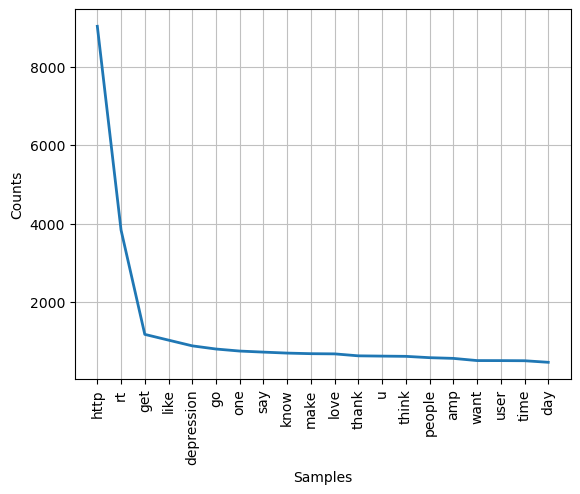

[('http', 9041), ('rt', 3838), ('get', 1174), ('like', 1027), ('depression', 881), ('go', 800), ('one', 748), ('say', 721), ('know', 696), ('make', 681), ('love', 676), ('thank', 626), ('u', 619), ('think', 613), ('people', 579), ('amp', 561), ('want', 505), ('user', 504), ('time', 501), ('day', 461)]


In [58]:
topk, tfd_plot = example_pipeline.tfd()
print(topk)